# Prebiotic Molecule Accumulation Model 

## Model Overview

This notebook implements a time-dependent box model to simulate the accumulation of prebiotic organic molecules in a hypothetical early Earth surface environment. By representing the pond as an open system, we track the net accumulation of organic material as a function of production, degradation, and transport. The system’s evolution is governed by a **first-order ordinary differential equation (ODE)** solved via **numerical integration**.

## Model Assumptions.

To establish a baseline for this computational series, the following assumptions are made:

1. The system is treated as a single, well-mixed environment, such that the concentration of prebiotic molecules is spatially uniform at all times.

2. Prebiotic molecule **production** occurs at a constant average rate, representing continuous abiotic synthesis.

3. **Molecular destruction** (UV photolysis, hydrolysis) and **environmental loss** (seepage) processes are proportional to the current molecule concentration.

4. External input (e.g., rainfall-driven delivery or concentration effects) are treated as a continuous periodic function rather than discrete stochastic events.

5. The model does not attempt to represent specific chemical species, but rather an abstract concentration of generic prebiotic organic molecules.

## Mathematical Formulation


* Let **C(t)** represent the concentration of prebiotic molecules at time **t**

The rate of change of C(t) is given by:

**dC/dt = P − D·C − L·C + R(t)**


 - The equation represents a balance between processes that *increase* molecular concentration and processes that *decrease* it

## Parameter Definitions.


The parameters used in the model are defined as follows:

- **C(t)**: Concentration of prebiotic organic molecules at time t.

- **P**: Production rate of prebiotic molecules- continuous synthesis processes occurring in the environment.

- **D**: Destruction rate constant- molecular breakdown due to environmental factors such as UV radiation or thermal instability.

- **L**: Loss rate constant- physical removal processes such as dilution, seepage, or degradation not explicitly modeled.

- **R(t)**: Time-dependent external input- episodic environmental contributions 

## Numerical Integration

The model is integrated over time using the `solve_ivp` function from the SciPy library.



In [49]:
# import necessary libraries

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [53]:
# the model function - 
def prebiotic_model(t, C, P, D, L, R0, T):
    """
    Differential equation describing prebiotic molecule accumulation.
    """
    R = R0 * np.sin(2 * np.pi * t / T)**2
    dCdt = P - D * C - L * C + R
    return dCdt

# i.e., given time and curent C, compute dC/dt

In [55]:
# Time span (start, end) - arbitrary
t_start = 0
t_end = 100

# Initial concentration
C0 = [0.0]

In [57]:
# Parameter values (exploratory)
P = 0.5    # production rate
D = 0.02   # destruction rate
L = 0.01   # loss rate
R0 = 1.0   # maximum rainfall contribution
T = 10     # rainfall cycle period

In [59]:
# solving teh equation 

solution = solve_ivp(
    prebiotic_model,
    (t_start, t_end),
    C0,
    args=(P, D, L, R0, T),
    dense_output=True
)

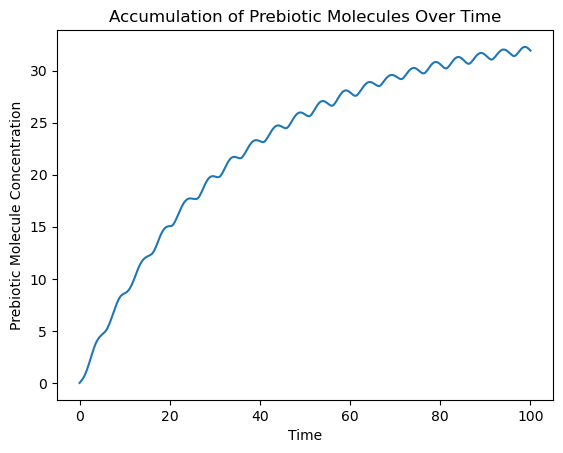

In [61]:
# plot

t = np.linspace(t_start, t_end, 500)
C = solution.sol(t)[0]

plt.figure()
plt.plot(t, C)
plt.xlabel("Time")
plt.ylabel("Prebiotic Molecule Concentration")
plt.title("Accumulation of Prebiotic Molecules Over Time")
plt.show()

## Results


## Discussion